In [1]:
import re
import json
import seaborn as sns
import arabic_reshaper as a_r
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg

%matplotlib inline

In [19]:
# search for the first instance of the word (with matching regex)
# save the tfiddf value to the category and era

def tf_time_of_word(spec_word_dict, word, pattern, max_thres=5, *args, **kwargs):
    spec_word_dict[word] = {}
    wrong = kwargs.get('wrong', re.compile("ااااااااا"))

    for category in range(len(all_word_freqs)):
        spec_word_dict[word][category] = {}
        for era in range(len(all_word_freqs[category])):
            for w_f in all_word_freqs[category][era]:
                if (pattern.match(w_f[0])) and (not wrong.match(w_f[0])) and (w_f[1] < max_thres):
                    spec_word_dict[word][category][era] = w_f[1]
                    break

In [18]:
# dict to hold tfidf values - used to plot
spec_word_dict = {}

# conssitent clean mellow color palatte
current_palette = sns.color_palette()

category_graphs = {
    134: ['Ḥanafī', current_palette[0]],
    135: ['Mālikī', current_palette[1]],
    136: ['Shāfiʿī', current_palette[2]],
    137: ['Ḥanbalī', current_palette[3]],
}

# load term frequency values
with open('../../data/all_word_freqs_99.json', 'r') as f:
        all_word_freqs = json.load(f)

In [21]:
# single plot of word over time per category
# used initially, but plots got large

def plot_freq_time(word, max_val):
    f,ax = plt.subplots(figsize=(20,10))
    for i,category in enumerate(category_graphs):
        ax.plot(list(spec_word_dict[word][i].values()),label=category_graphs[category][0],color=category_graphs[category][1],
                linewidth = 5, linestyle = '-', alpha=.7)

    ax.legend(fontsize=15);
    ax.set_ylim(0,max_val);
    ax.set_xlabel("Lunar Year", fontsize=19);
    ax.set_ylabel("Word Frequency", fontsize=19);
    ax.set_xticklabels([0,200,500,700,900,1250,1500], fontsize=15);
    [tick.label.set_fontsize(15) for tick in ax.yaxis.get_major_ticks()]
    plt.savefig('../../images/presentation/'+str(word)+'.png')

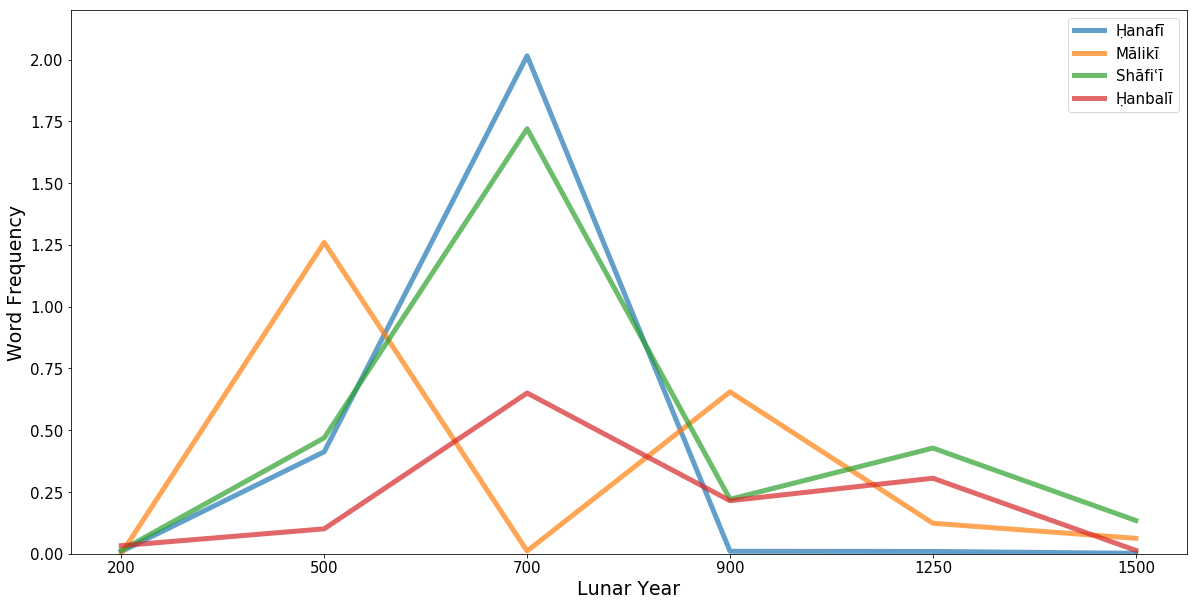

In [26]:
tf_time_of_word(spec_word_dict, word='حنيفة', pattern=re.compile("[أبلو]*حن[ا]*[ي]*ف[ي]*[ة]*"))
plot_freq_time('حنيفة',2.2)

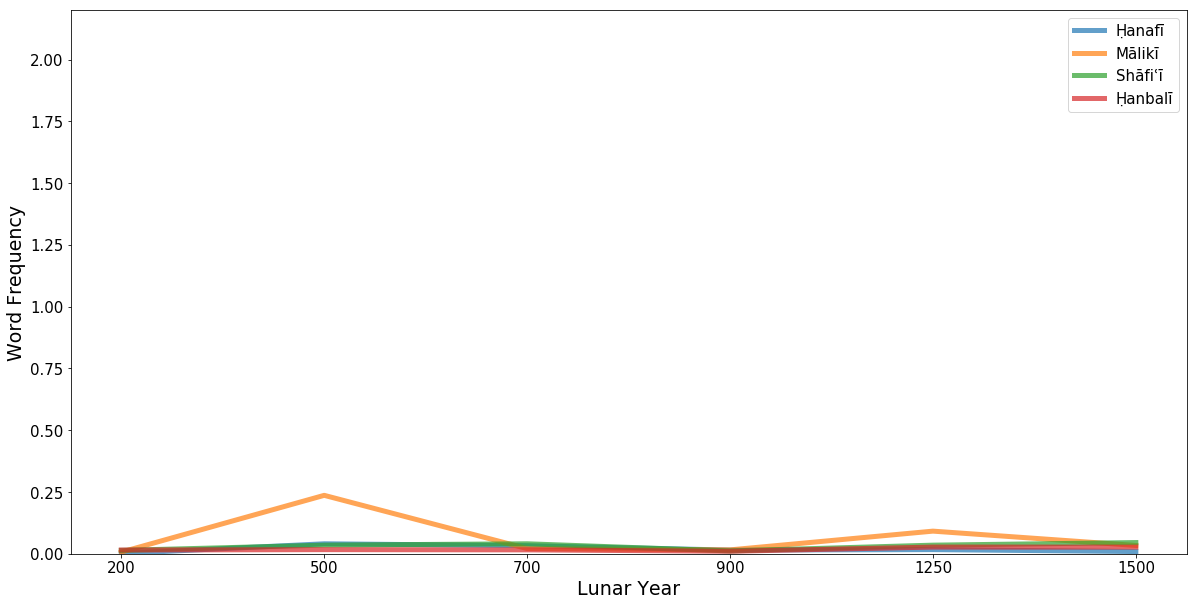

In [27]:
tf_time_of_word(spec_word_dict, word='مالك', pattern=re.compile("مالك[يا]*[^هموة][و]*"))
plot_freq_time('مالك', 2.2)

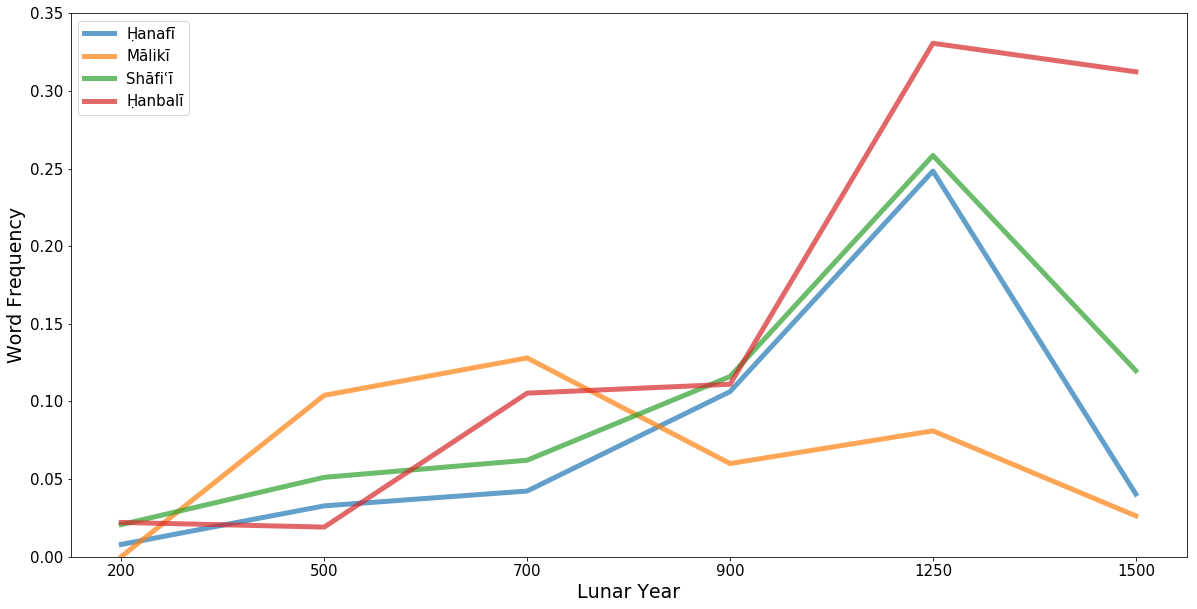

In [38]:
tf_time_of_word(spec_word_dict, word='إجماع', pattern=re.compile("[الو]*[اإ]جماع"))
plot_freq_time('إجماع', .35)

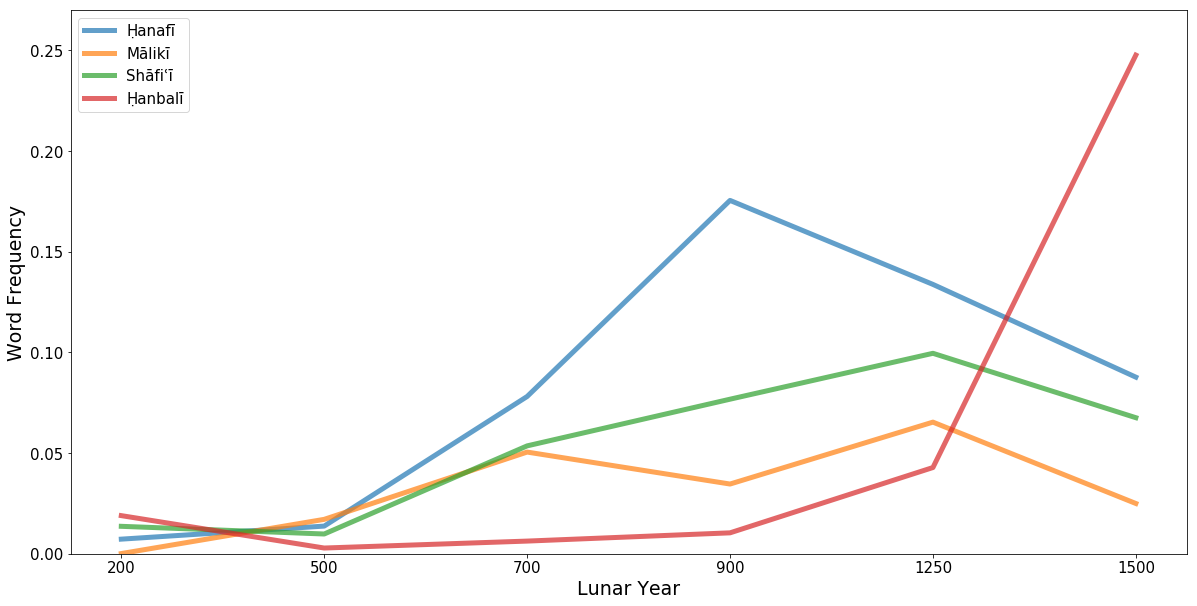

In [35]:
tf_time_of_word(spec_word_dict, word='فتوى', pattern=re.compile("[الوفم]*فت[اوى]*$"))
plot_freq_time('فتوى', .27)

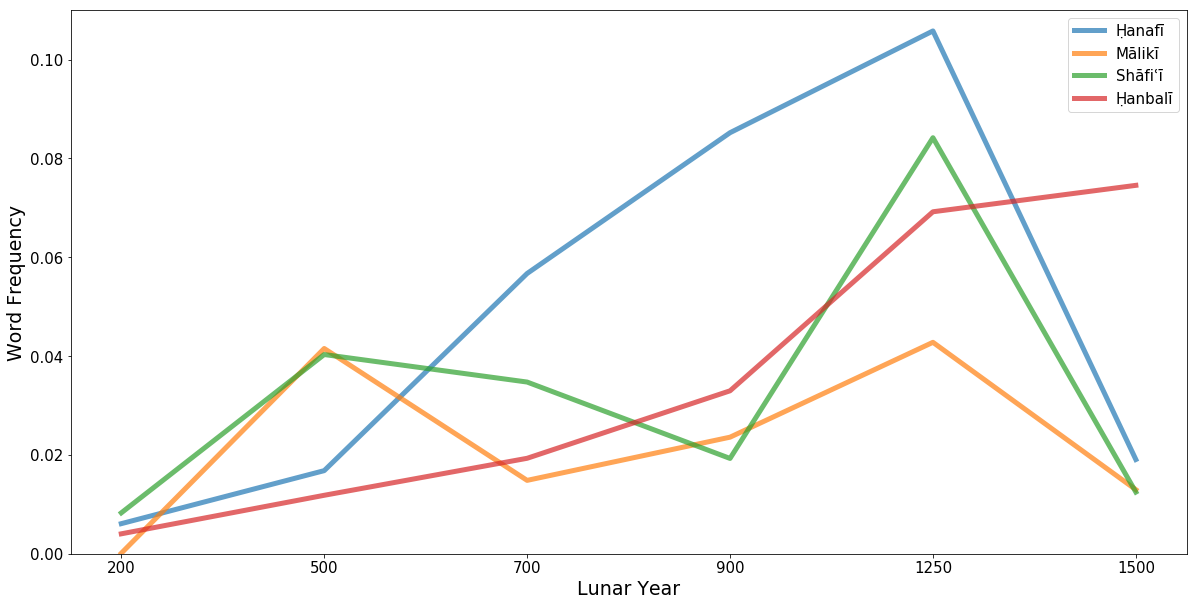

In [41]:
tf_time_of_word(spec_word_dict, word='احتياط', pattern=re.compile("[البوف]*احتياط[ا]*"))
plot_freq_time('احتياط', .11)

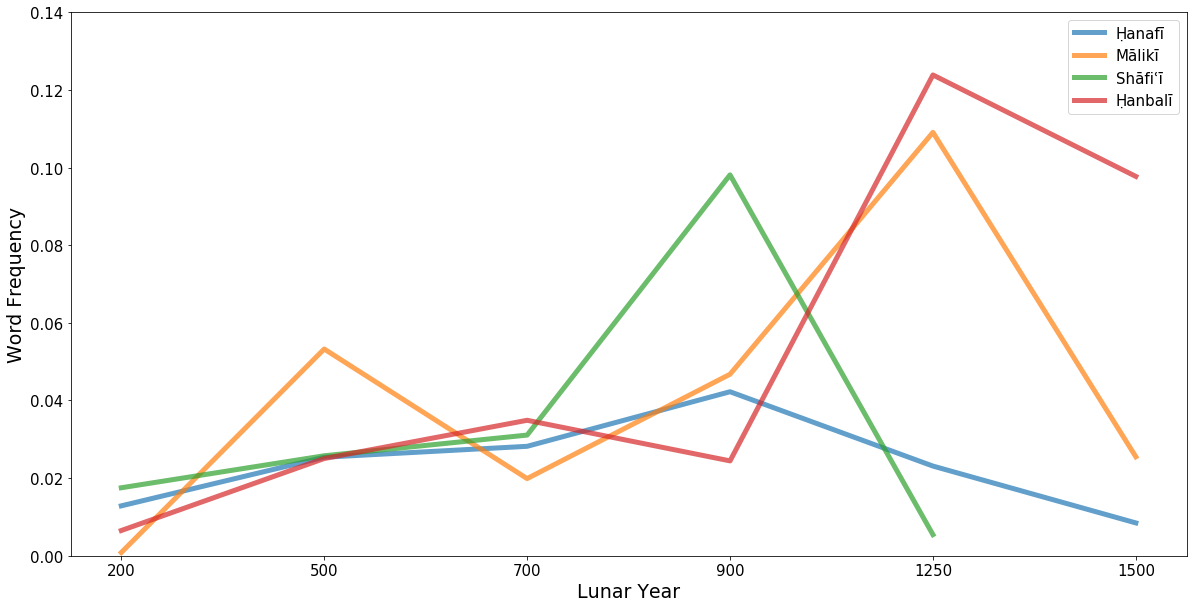

In [42]:
tf_time_of_word(spec_word_dict, word='فتنة', pattern=re.compile("[البوف]*فتنة"))
plot_freq_time('فتنة', .14)

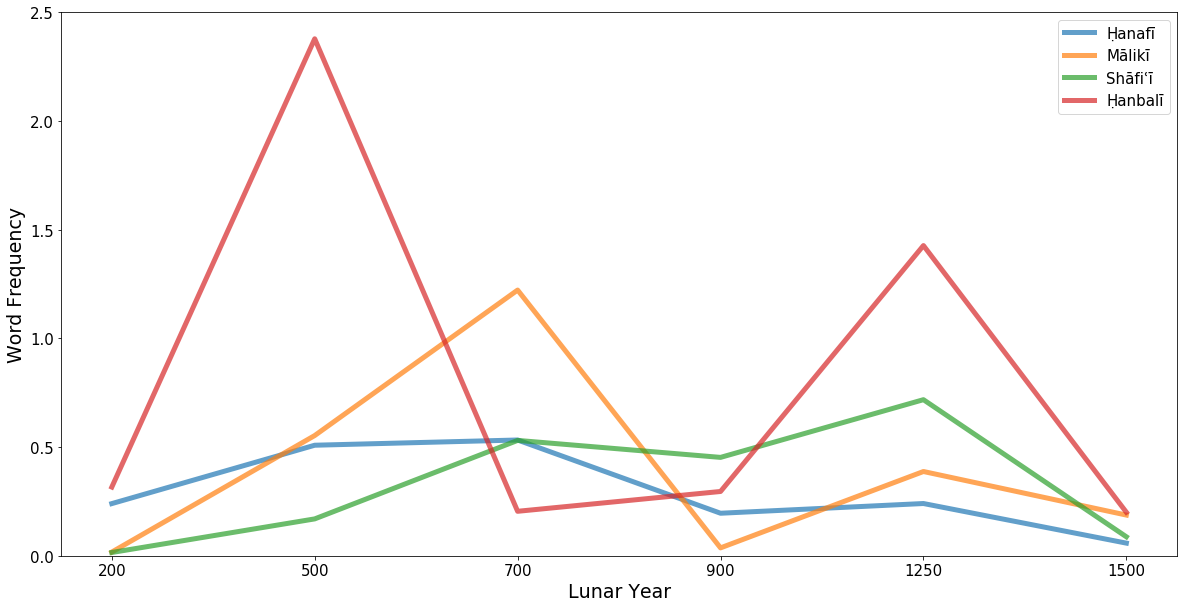

In [43]:
tf_time_of_word(spec_word_dict, word='حديث', pattern=re.compile("[الفو]*[ل]*حد[ي]*ث"), wrong=re.compile("للحدث"))
plot_freq_time('حديث', 2.5)